In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("data.csv")

In [28]:
df.shape

(10000, 13)

In [29]:
df.sample(5)

,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,admission_type,discharge_date,medication,test_results
9976,81,Female,AB-,Arthritis,2019-03-06,Christian Dixon,"Munoz, Parks and Jimenez",Blue Cross,37726.181757,Elective,2019-04-05,Aspirin,Normal
56,21,Male,A+,Cancer,2021-12-28,Sara Watts,"Gray, Andersen and Williams",Cigna,44935.269697,Emergency,2022-01-09,Lipitor,Abnormal
1082,73,Female,AB-,Diabetes,2022-03-15,Terry Allen,Valdez-Mcconnell,Aetna,33080.820075,Urgent,2022-03-19,Aspirin,Normal
3197,23,Female,B+,Arthritis,2021-02-27,Andrea Kim,Orozco and Sons,Medicare,16486.724985,Elective,2021-03-26,Lipitor,Normal
3098,58,Female,AB-,Hypertension,2020-07-27,Ryan Brown,Li-Jones,Medicare,13691.821196,Emergency,2020-08-06,Aspirin,Abnormal


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   gender              10000 non-null  object 
 2   blood_type          10000 non-null  object 
 3   medical_condition   10000 non-null  object 
 4   date_of_admission   10000 non-null  object 
 5   doctor              10000 non-null  object 
 6   hospital            10000 non-null  object 
 7   insurance_provider  10000 non-null  object 
 8   billing_amount      10000 non-null  float64
 9   admission_type      10000 non-null  object 
 10  discharge_date      10000 non-null  object 
 11  medication          10000 non-null  object 
 12  test_results        10000 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1015.8+ KB


In [31]:
df.describe()

,age,billing_amount
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112566
75%,68.000000,37733.913727
max,85.000000,49995.902283


- how age depends on medical condition;
- how age depends on billing amount;
- how age depends on admission type;
- how test results depends on age;
- how medical condition depends on gender (with age);
- how blood type depends on meidcal condition;
- how blood type depends on admission type, medication, test results;
- how medical condition, admission type depends on time spent in hospital;
- how medical condition depends on billing amount;
- how medical condition depends on admission type;
- how billing amount, medication depends on doctor;
- how admission type depends on medication, test results;
- how medication depends on test results;

# Medical condition vs Age

In [7]:
df["medical_condition"].value_counts()

medical_condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

## Asthma distribution

In [8]:
asthma_df = df[df.medical_condition == "Asthma"][["medical_condition", "age"]]
asthma_df.value_counts()

medical_condition  age
Asthma             78     32
                   55     32
                   63     32
                   48     31
                   64     31
                          ..
                   50     19
                   52     18
                   82     17
                   85     17
                   37     16
Name: count, Length: 68, dtype: int64

In [9]:
asthma_age = asthma_df["Age"]

KeyError: 'Age'

In [ ]:
asthma_age.min()

In [ ]:
asthma_age.max()

In [ ]:
ax_asthma = asthma_age.plot(kind="kde", figsize=(10, 5), title="Asthma distribution")
ax_asthma.set_xlabel("Age")

## Cancer distribution

In [ ]:
cancer_df = df[df.Medical_Condition == "Cancer"]

In [ ]:
cancer_age = cancer_df["Age"]

In [ ]:
cancer_age.value_counts()

In [ ]:
ax_cancer = cancer_age.plot(kind="kde", figsize=(10, 5), title="Cancer distribution")
ax_cancer.set_xlabel("Age")

## Hypertension distribution

In [ ]:
hypertension_df = df[df.medical_condition == "Hypertension"]

In [ ]:
hypertension_age = hypertension_df["age"]

In [ ]:
hypertension_age.value_counts()

In [ ]:
ax_hypertension = hypertension_age.plot(kind="kde", figsize=(10, 5), title="Hypertension distribution")
ax_hypertension.set_xlabel("Age")

## Arthritis distribution

In [ ]:
arthritis_df = df[df.medical_condition == "Arthritis"]

In [ ]:
arthritis_age = arthritis_df["age"]

In [ ]:
ax_arthritis = arthritis_age.plot(kind="kde", figsize=(10, 5), title="Arthritis distribution")
ax_arthritis.set_xlabel("Age")

## Obesity distribution

In [ ]:
obesity_df = df[df.medical_condition == "Obesity"]

In [ ]:
obesity_age = obesity_df["age"]

In [ ]:
ax_obesity = obesity_age.plot(kind="kde", figsize=(10, 5), title="Obesity distribution")
ax_obesity.set_xlabel("Age")

## Diabetes distribution

In [ ]:
diabetes_df = df[df.medical_condition == "Diabetes"]

In [ ]:
diabetes_age = diabetes_df["age"]

In [ ]:
diabetes_ax = diabetes_age.plot(kind="kde", figsize=(10, 5), title="Diabetes distribution")
diabetes_ax.set_xlabel("Age")

# Age vs Billing Amount

In [ ]:
df.billing_amount.max()

In [ ]:
df.billing_amount.min()

In [ ]:
df.plot(kind="scatter", x="billing_amount", y="age", figsize=(10, 5), title="Age vs Billing amount")
plt.show()

# Admission type vs Age

In [53]:
df["admission_type"].value_counts()

admission_type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

In [54]:
admission_type_groups = df.groupby("admission_type")

## Urgent type vs age

In [55]:
urgent_group = admission_type_groups.get_group("Urgent")

Text(0.5, 0, 'Age')

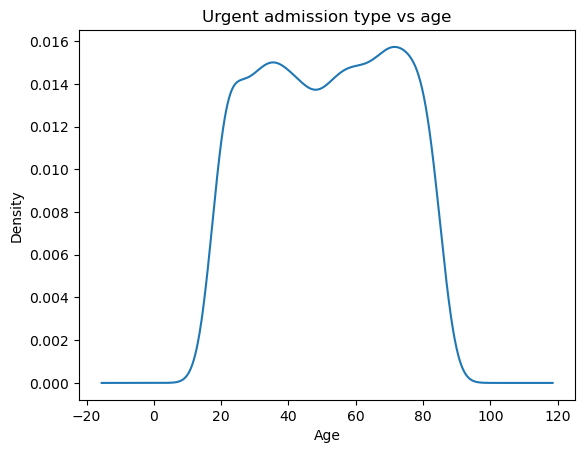

In [56]:
ax_urgent = urgent_group.age.plot(kind="kde", title="Urgent admission type vs age")
ax_urgent.set_xlabel("Age")

## Emergency type vs age

In [ ]:
emergency_group = admission_type_groups.get_group("Emergency")

In [ ]:
ax_emergency = emergency_group.age.plot(kind="kde", title="Emergency admission type vs age")
ax_emergency.set_xlabel("Age")

## Elective type vs age

In [ ]:
elective_group = admission_type_groups.get_group("Elective")

In [ ]:
ax_elective = elective_group.age.plot(kind="kde", title="Elective admission type vs age")
ax_elective.set_xlabel("Age")

# Test results vs age

In [ ]:
df.test_results.value_counts()

In [32]:
test_results_groups = df.groupby("test_results")

In [33]:
age_groups = test_results_groups["age"].value_counts().unstack()
age_groups

age,18,19,20,21,22,23,24,25,26,27,...,76,77,78,79,80,81,82,83,84,85
test_results,,,,,,,,,,,,,,,,,,,,,
Abnormal,59,50,58,46,49,46,46,52,47,40,...,43,53,65,54,34,58,42,43,50,48
Inconclusive,52,39,55,53,31,69,49,57,49,48,...,57,46,61,44,43,52,50,39,34,39
Normal,53,43,56,54,43,40,41,40,57,37,...,45,54,48,53,53,49,55,49,49,36


/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

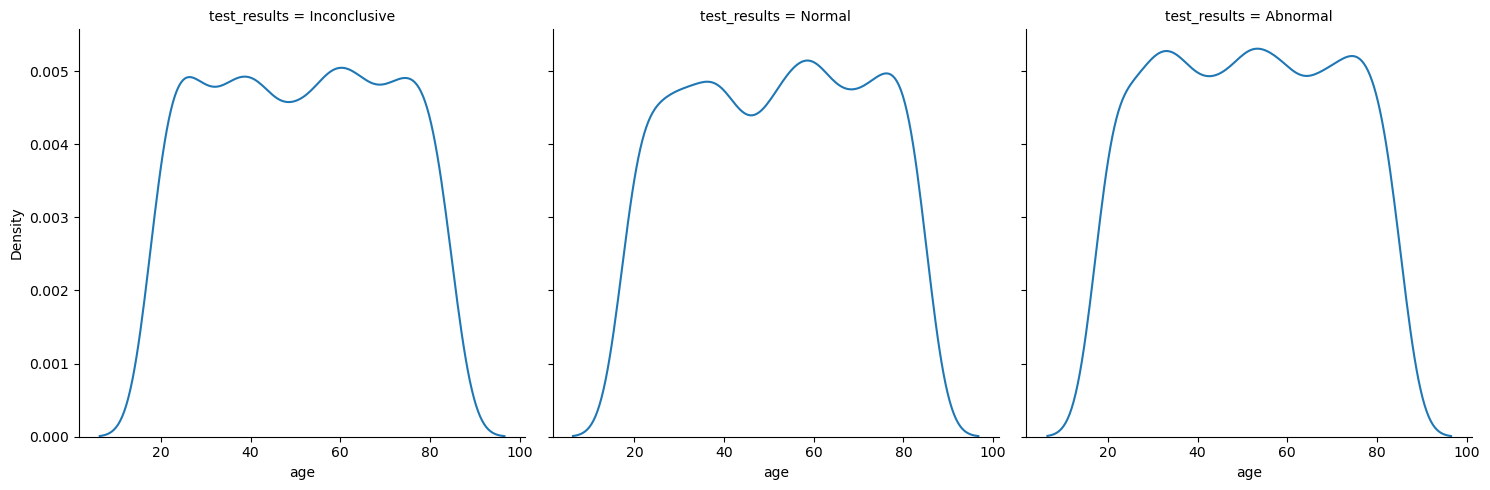

In [48]:
sns.displot(df, x="age", col="test_results", kind="kde")

# Medical condition vs Gender (by age)

In [35]:
df["gender"].value_counts()

gender
Female    5075
Male      4925
Name: count, dtype: int64

## Male medical condition vs age

In [47]:
male_df = df[df["gender"] == "Male"]
male_df.head()

,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,admission_type,discharge_date,medication,test_results
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal
5,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal


In [37]:
male_df.medical_condition.value_counts()

medical_condition
Hypertension    852
Arthritis       835
Asthma          834
Cancer          816
Diabetes        798
Obesity         790
Name: count, dtype: int64

/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

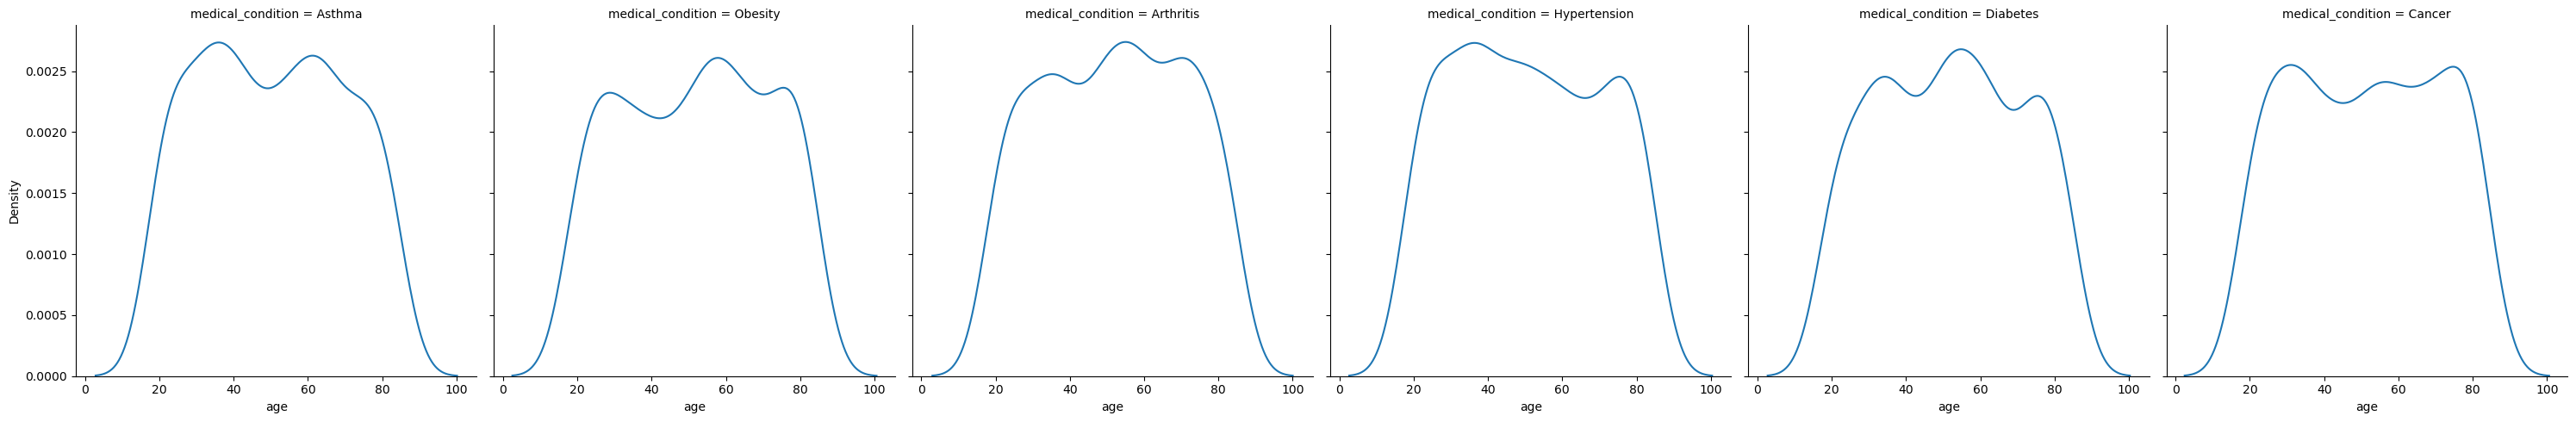

In [49]:
sns.displot(data=male_df, x="age", col="medical_condition", kind="kde")

## Female medical condition vs age

In [50]:
female_df = df[df["gender"] == "Female"]
female_df.head()

,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,admission_type,discharge_date,medication,test_results
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
7,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal
9,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,Urgent,2022-12-16,Aspirin,Normal
11,23,Female,O-,Hypertension,2019-06-09,William Miller,Rose Inc,Medicare,6185.903530,Emergency,2019-06-26,Paracetamol,Inconclusive
12,85,Female,A+,Diabetes,2021-11-29,Laura Roberts,"Malone, Thompson and Mejia",Aetna,4835.945650,Elective,2021-12-14,Aspirin,Inconclusive


/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

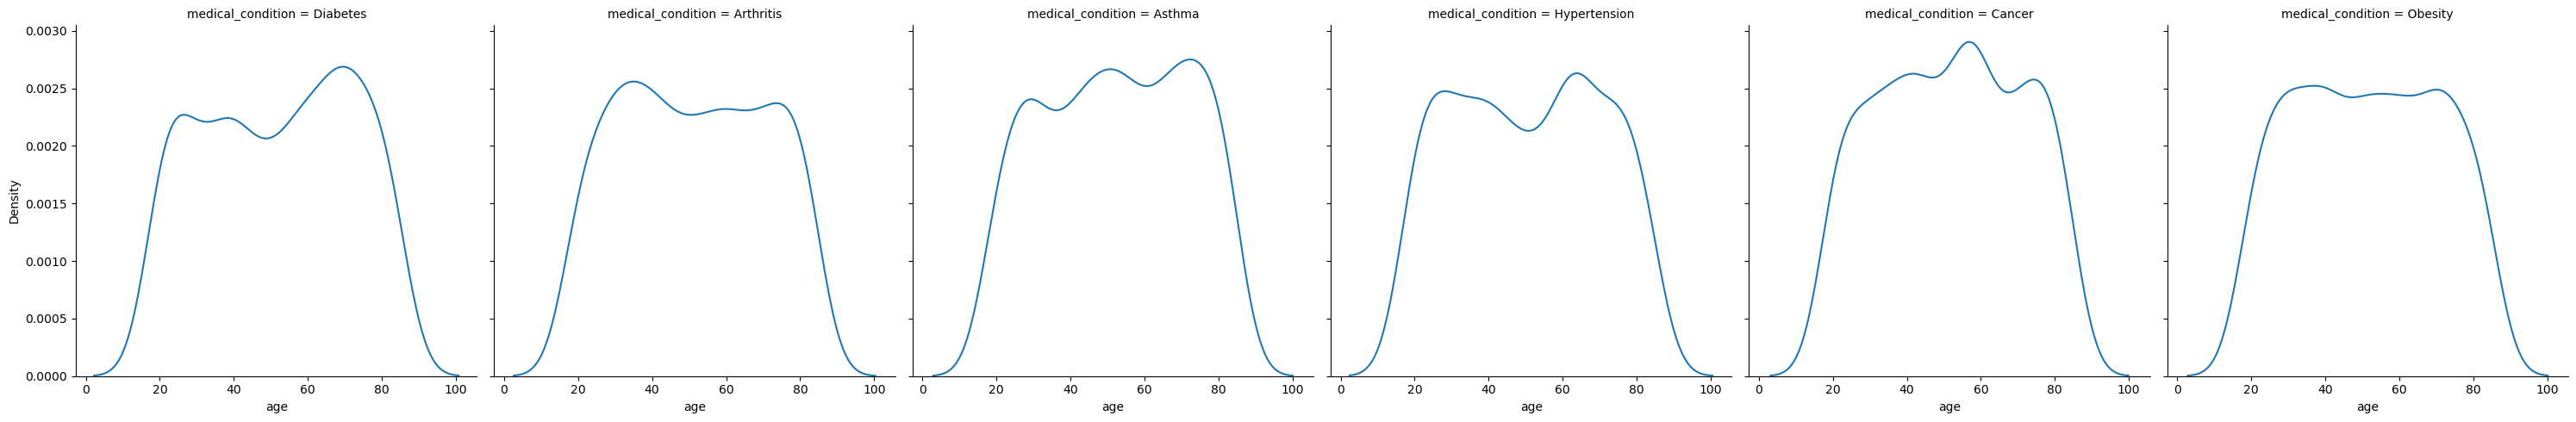

In [51]:
sns.displot(data=female_df, x="age", col="medical_condition", kind="kde")

# Blood type vs medical condition

In [60]:
df["blood_type"].value_counts()

blood_type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

In [61]:
df["medical_condition"].value_counts()

medical_condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/school/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

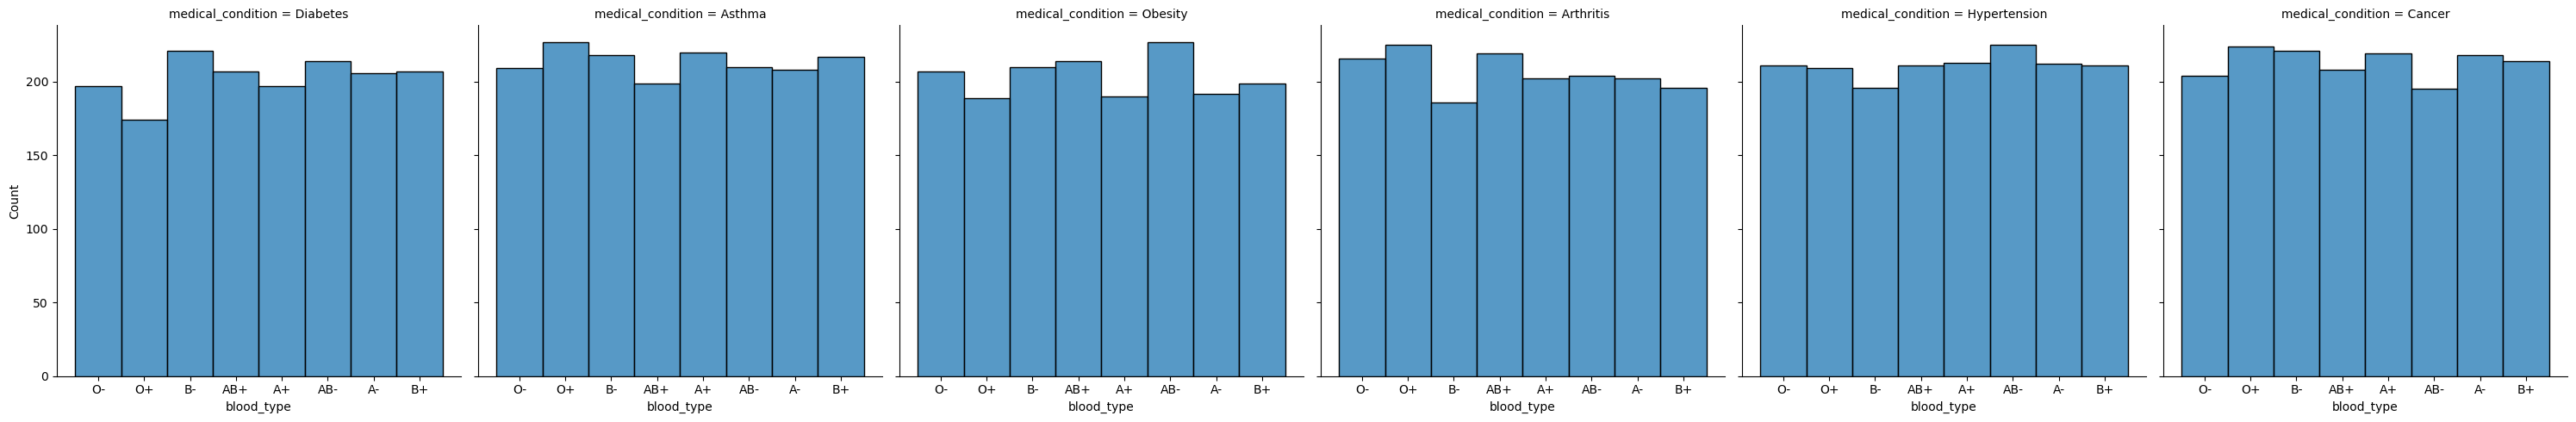

In [64]:
sns.displot(data=df, x="blood_type", col="medical_condition", kind="hist")